CAT ONE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
data = pd.read_csv("items.csv")
data

,rating,description,title,brand,image_urls,product_url,price
0,3.5: Based on 2 ratings,\r\n,"HP 255 G6 E2-9000e AMD (4GB,500GB HDD) 15.6-In...",HP,https://ng.jumia.is/XLeI8ccG39OcVgXulEn5Fwzw91...,https://www.jumia.com.ng/hp-255-g6-e2-9000e-am...,#86990
1,0: No rating yet.,Dependable performanceWith the latest Intel® p...,"HP Notebook 15 Touchscreen Core I3 (8GB RAM, 1...",HP,https://ng.jumia.is/pp2OhB6wpKt8u18Grrf4SDPJtT...,https://www.jumia.com.ng/hp-notebook-15-touchs...,#145000
2,0: No rating yet.,NaN,"HP Pavilion 15 Touchscreen Core I5 8 GB RAM, 1...",HP,https://ng.jumia.is/qCWxFU_FQmXLnCSJgqmhuhGD3T...,https://www.jumia.com.ng/hp-pavilion-15-touchs...,#195000
3,0: No rating yet.,Lenovo 14-inch ThinkPad T440 Ultrabook is the ...,Lenovo Lenovo T440 14-inch ThinkPad (Intel Co...,Lenovo,https://ng.jumia.is/3zEOmdhzU34BXo6y4qyOuNKqwg...,https://www.jumia.com.ng/lenovo-lenovo-t440-14...,#142200
4,0: No rating yet.,NaN,HP Notebook -15-bs013dx- Intel Core I3 - 2.4GH...,HP,https://ng.jumia.is/ZMoW06v1WcbnTYF2E9QAP0Hmfe...,https://www.jumia.com.ng/hp-notebook-15-bs013d...,#155000
5,0: No rating yet.,Windows 10 operating system,"Acer TravelMate 11.6"" Laptop - Intel Celeron Q...",Acer,https://ng.jumia.is/ti6vy-Z37LeISOPzk4ZBX4lnHm...,https://www.jumia.com.ng/travelmate-11.6-lapto...,#78790
6,0: No rating yet.,"Lenovo ThinkPad Yoga 370 13Inch Core i5,8GB ,2...","Lenovo ThinkPad Yoga 370 13Inch Core I5,8GB ,2...",Lenovo,https://ng.jumia.is/MTi8NNnpBGPQNm2S_lLTMQqWAt...,https://www.jumia.com.ng/lenovo-thinkpad-yoga-...,#310000
7,0: No rating yet.,DELL Precision M3520 CORE I7 500GB 8GB 2.80GHZ...,Dell Precision M3520 CORE I7 500GB 8GB 2.80GH...,Dell,https://ng.jumia.is/eKrs90kJzNDYx2yyC-E1umpkZi...,https://www.jumia.com.ng/dell-precision-m3520-...,#315000
8,4.7: Based on 7 ratings,\r\n \r\n\r\n\r\n\t\r\n\t\t,"T-bao Tbook X7 14.1"" Notebook - Silver",T-bao,https://ng.jumia.is/j1mLpXYxZ-uUHMtzTltNy1XTCA...,https://www.jumia.com.ng/t-bao-tbook-x7-14.1-n...,#60100
9,0: No rating yet.,The,HP Pavillion 15 Intel Core I5 TOUCH SCREEN (8G...,HP,https://ng.jumia.is/X3NntFG8KAQvTN_EQ76GHv1y0I...,https://www.jumia.com.ng/hp-pavillion-15-intel...,#192000


In [57]:
import pandas as pd
import re

# Load CSV file into pandas DataFrame
df = pd.read_csv('items.csv')

# Define regex pattern to match URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Define function to remove URLs from a column
def remove_urls(text):
    return url_pattern.sub('', text)

# Apply the function to all relevant columns
df['image_urls'] = df['image_urls'].apply(remove_urls)
df['product_url'] = df['product_url'].apply(remove_urls)

# Write the cleaned data back to the CSV file
df.to_csv('nourl.csv', index=False)


In [58]:
import csv
import re

# Open the input CSV file for reading
with open('nourl.csv', newline='') as csvfile:

    # Create a CSV reader object
    reader = csv.reader(csvfile)

    # Open the output CSV file for writing
    with open('nospecial.csv', 'w', newline='') as outfile:

        # Create a CSV writer object
        writer = csv.writer(outfile)

        # Loop over each row in the input CSV file
        for row in reader:

            # Loop over each cell in the row
            for i in range(len(row)):

                # Remove any non-alphanumeric characters from the cell
                row[i] = re.sub(r'[^a-zA-Z0-9 ]', '', row[i])

            # Write the cleaned-up row to the output CSV file
            writer.writerow(row)

In [103]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# read the CSV file into a pandas dataframe
df = pd.read_csv('lowercase.csv')

# apply tokenization to the 'text' column of the dataframe
df['Title_tokens'] = df['title'].apply(word_tokenize)
df['Rating_tokens'] = df['rating'].apply(word_tokenize)
#df['Description_tokens'] = df['description'].apply(word_tokenize)
df['Brand_tokens'] = df['brand'].apply(word_tokenize)
#df['Price_tokens'] = df['price'].apply(word_tokenize)

# save the tokenized data to a new CSV file
df.to_csv('tokenize.csv', index=False)


In [104]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('tokenize.csv', error_bad_lines=False)

# Convert the DataFrame to a list of strings
text_list = df['rating'].tolist()

# Define a function to remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word not in stopwords.words('english')]

# Remove stopwords from each string in the list of strings
text_list = [' '.join(remove_stopwords(nltk.word_tokenize(text))) for text in text_list]

# Replace the original text with the new text in the DataFrame
df['text_column'] = text_list

# Save the new DataFrame to a new CSV file
df.to_csv('stopwords.csv', index=False)


[nltk_data] Downloading package punkt to C:\Users\Migero
[nltk_data]     Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Migero
[nltk_data]     Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Migero Mike\AppData\Local\Temp\ipykernel_2808\3914181549.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('tokenize.csv', error_bad_lines=False)


In [105]:
import csv
from nltk.stem import SnowballStemmer

# Define the stemmer
stemmer = SnowballStemmer('english')

# Open the input CSV file and create the output CSV file
with open('stopwords.csv', 'r') as input_file, open('stemmed.csv', 'w', newline='') as output_file:
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)

    # Loop through each row in the input file
    for row in reader:
        stemmed_row = []

        # Loop through each column in the row and stem the text
        for column in row:
            stemmed_text = ' '.join([stemmer.stem(word) for word in column.split()])
            stemmed_row.append(stemmed_text)

        # Write the stemmed row to the output file
        writer.writerow(stemmed_row)


In [106]:
import csv
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Open the input and output files
with open('stemmed.csv', 'r') as infile, open('lemmatized.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    # Loop through each row in the input file
    for row in reader:
        
        # Lemmatize each word in the row
        lemmatized_row = [lemmatizer.lemmatize(word) for word in row]
        
        # Write the lemmatized row to the output file
        writer.writerow(lemmatized_row)


In [107]:
with open('lemmatized.csv', 'r') as infile:
    reader = csv.reader(infile)
    for i in range(5):
        row = next(reader)
        print(row)


['rate', 'descript', 'titl', 'brand', 'imageurl', 'producturl', 'price', 'title_token', 'rating_token', 'brand_token', 'text_column']
['35 base on 2 rate', '', 'hp 255 g6 e29000 amd 4gb500gb hdd 156inch free dos laptop black', 'hp', '', '', '86990', "['hp', 255', g6', e29000e', amd', 4gb500gb', hdd', 156inch', free', dos', laptop', black']", "['35', based', on', 2', ratings']", "['hp']", '35 base 2 rate']
['0 no rate yet', 'depend performancewith the latest intel processor and plenti of hard drive space or ssd on select model you can work play multitask and store more of what matter to you get reliabl power and storag you can trustvibr displayth crisp hd screen let you enjoy your photo video and web page in detail or on select model the full hd let you get even more out of your display', 'hp notebook 15 touchscreen core i3 8gb ram 1000gb hdd free ext dvd drive bag window 10 laptop', 'hp', '', '', '145000', "['hp', notebook', 15', touchscreen', core', i3', 8gb', ram', 1000gb', hdd', fre

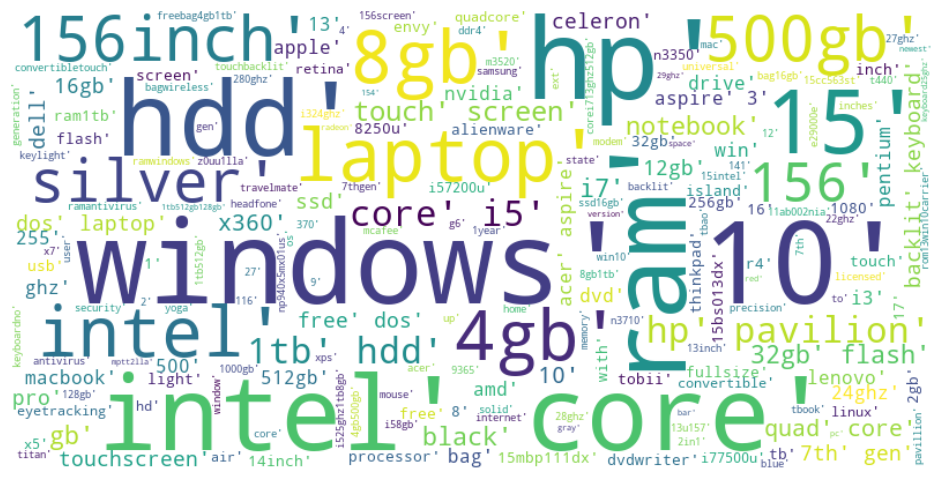

In [111]:
import pandas as pd
from wordcloud import WordCloud

# Load the CSV file
df = pd.read_csv('lemmatized.csv')

# Combine all the text data into a single string
text = " ".join(review for review in df.title_token)

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text)

# Display the generated word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
